In [177]:
import numpy as np
import matplotlib.pyplot as plt
from supervised_experiment import ActionNet, AngleMLPNet, block_wigner_d
from vi_lie import rodrigues
import torch
from lie_learn.groups.SO3 import change_coordinates as SO3_coordinates

In [178]:
action_net = ActionNet(3)
action_net.load_state_dict(torch.load('supervised_outputs/action.pickle'))
mlp_net = AngleMLPNet(3)
mlp_net.load_state_dict(torch.load('supervised_outputs/mlp.pickle'))

In [187]:
start = torch.rand(3)[None] * 5
end = torch.rand(3)[None] * 5
t = torch.linspace(0, 1, 10)[:, None]
x = (1-t) * start + end * t
rot = rodrigues(x).detach()

rot = rot.numpy().astype(np.float64)
angles = np.stack([SO3_coordinates(r, 'MAT', 'EA323') for r in rot], 0)  # ZYZ Euler angles
wigner_ds = np.stack([block_wigner_d(3, a) for a in angles], 0)

angles = torch.tensor(angles, dtype=torch.float32)
wigner_ds = torch.tensor(wigner_ds, dtype=torch.float32)

action_outputs = action_net(wigner_ds)
mlp_outputs = mlp_net(angles)

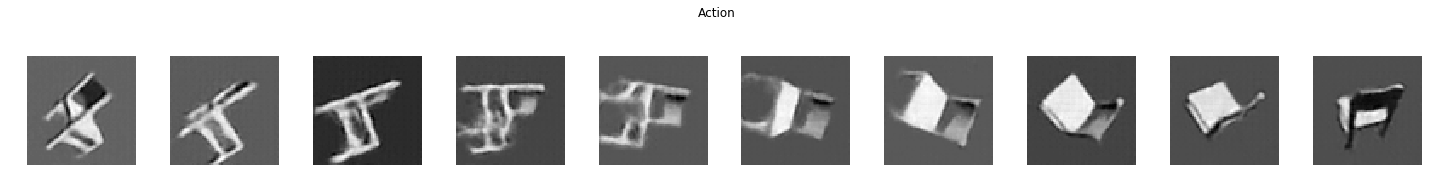

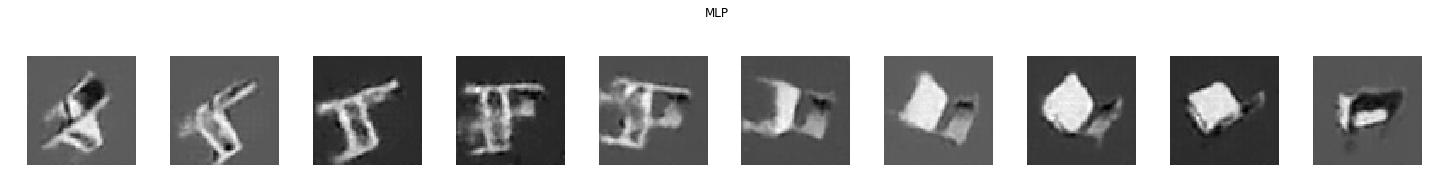

In [188]:
def plot_output(images, title=""):
    fig, ax = plt.subplots(1, 10, figsize=(20, 3))
    for ax, im in zip(ax.flatten(), images):
        ax.imshow(im.detach(), 'gray')
        ax.set_axis_off()
    fig.suptitle(title)
    fig.tight_layout()
plot_output(action_outputs, 'Action')
plot_output(mlp_outputs, 'MLP')